#### Exercise #: Simulate Monty Hall Game for 1000 times. Use a barplot and discuss whether players are better off sticking to their initial choice, or switching doors?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


In [4]:
def othergoat(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return "Goat 2"
    elif x == "Goat 2":
        return "Goat 1"

In [5]:
Doors = np.array(["Car","Goat 1","Goat 2"])     #Define a list for objects behind the doors
goats = np.array(["Goat 1" , "Goat 2"])          #Define a list for goats!

def MHgame():
    #Function to simulate the Monty Hall Game
    #For each guess, return ["the guess","the revealed", "the remaining"]
    userguess=np.random.choice(Doors)         #randomly selects a door as userguess
    if userguess == "Goat 1":
        return [userguess, "Goat 2","Car"]
    if userguess == "Goat 2":
        return [userguess, "Goat 1","Car"]
    if userguess == "Car":
        revealed = np.random.choice(goats)
        return [userguess, revealed,othergoat(revealed)]

In [6]:
# Check and see if the MHgame function is doing what it is supposed to do:
for i in np.arange(1):
    a =MHgame()
    print(a)
    print(a[0])
    print(a[1])
    print(a[2])

['Goat 2', 'Goat 1', 'Car']
Goat 2
Goat 1
Car


In [7]:
c1 = []         #Create an empty list for the userguess
c2 = []         #Create an empty list for the revealed
c3 = []         #Create an empty list for the remaining
for i in np.arange(1000):         #Simulate the game for 1000 rounds - or any other number of rounds you desire
    game = MHgame()
    c1.append(game[0])             #In each round, add the first element to the userguess list
    c2.append(game[1])             #In each round, add the second element to the revealed list
    c3.append(game[2])             #In each round, add the third element to the remaining list


In [8]:
#Create a data frame (gamedf) with 3 columns ("Guess","Revealed", "Remaining") and 1000 (or how many number of rounds) rows
gamedf = pd.DataFrame({'Guess':c1,
                       'Revealed':c2,
                       'Remaining':c3})
gamedf

,Guess,Revealed,Remaining
0,Car,Goat 2,Goat 1
1,Goat 1,Goat 2,Car
2,Goat 2,Goat 1,Car
3,Car,Goat 1,Goat 2
4,Goat 2,Goat 1,Car
...,...,...,...
995,Goat 1,Goat 2,Car
996,Goat 1,Goat 2,Car
997,Goat 1,Goat 2,Car
998,Goat 1,Goat 2,Car


In [9]:
# Get the count of each item in the first and 3rd column
original_car =gamedf[gamedf.Guess == 'Car'].shape[0]
remaining_car =gamedf[gamedf.Remaining == 'Car'].shape[0]

original_g1 =gamedf[gamedf.Guess == 'Goat 1'].shape[0]
remaining_g1 =gamedf[gamedf.Remaining == 'Goat 1'].shape[0]

original_g2 =gamedf[gamedf.Guess == 'Goat 2'].shape[0]
remaining_g2 =gamedf[gamedf.Remaining == 'Goat 2'].shape[0]

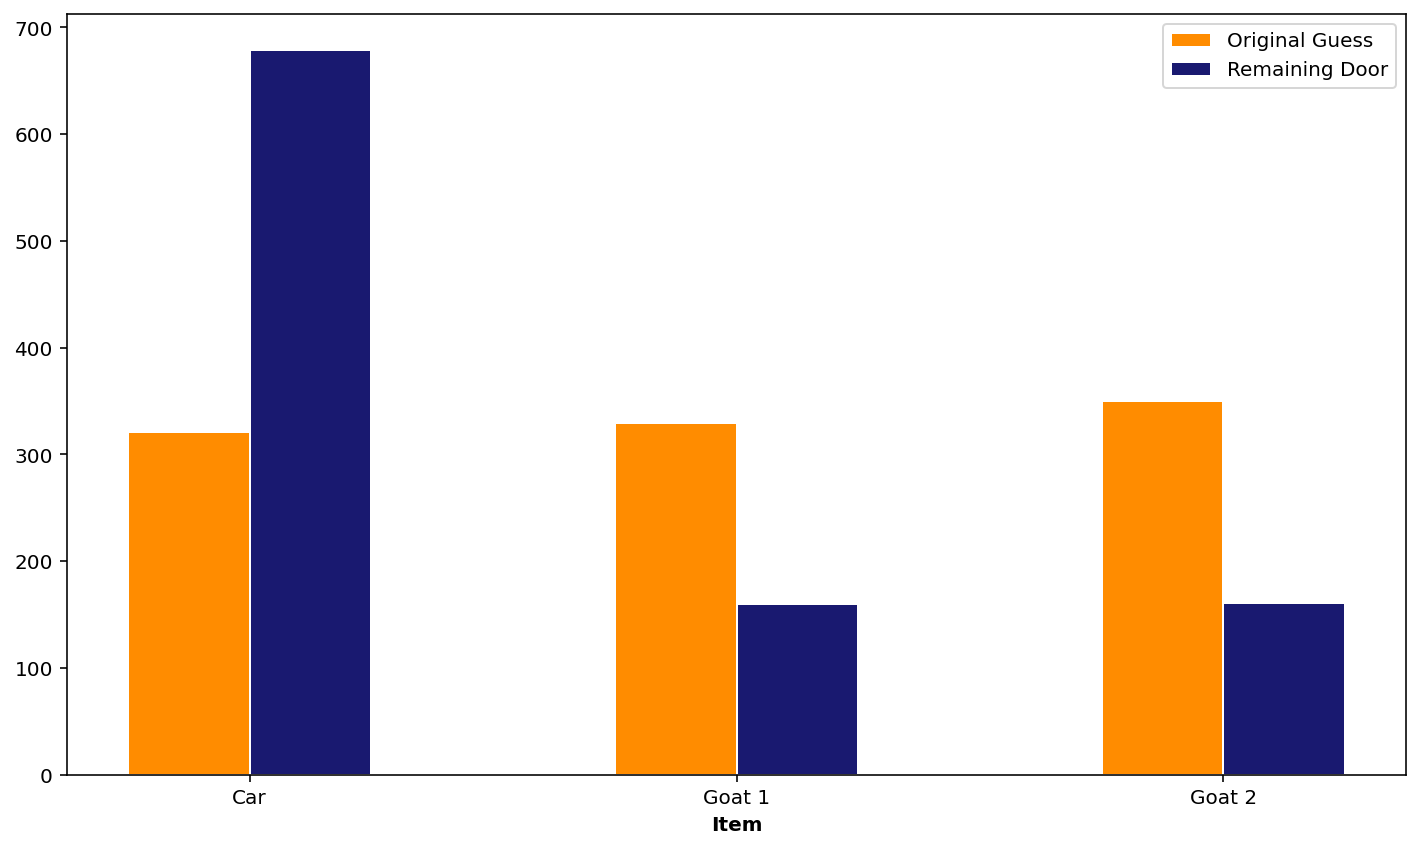

In [10]:
# Let's plot a grouped barplot

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [original_car,original_g1,original_g2]
bars2 = [remaining_car,remaining_g1,remaining_g2]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='darkorange', width=barWidth, edgecolor='white', label='Original Guess')
plt.bar(r2, bars2, color='midnightblue', width=barWidth, edgecolor='white', label='Remaining Door')
 
# Add xticks on the middle of the group bars
plt.xlabel('Item', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Car', 'Goat 1', 'Goat 2'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


<font color=crimson>__According to the plot, it is statitically beneficial for the players to switch doors because the initial chance for being correct is only 1/3__</font>